#Organize databases

In [ ]:
import pandas as pd

# ✅ Columns you want to keep
fixed_vars = [
    "CountryOfAsylum", "MonitoringDate", "nationality", "crossedborder", "leftresidence", "notsafehere",
    "ArriveThiscountry", "Intention", "groupsize", "TotalAdult", "TotalAdultFemale", "TotalAdultMale",
    "TotalMinor", "TotalMinorFemale", "TotalMinorMale", "Childinschool", "Childvirtualed", "ethnicity",
    "RouteIncident", "RegularEntry", "AppliedRefugee", "docResidence", "medicalAttention", "medicalReceived",
    "pressneeds", "housingtype", "water", "bathroom", "electricity", "mealsperday", "AbleBodied", "FeelSafe", "Isolation"
]

prefixes = [
    "reasonsreturn_", "Childwhynotschool_", "prevdeport_", "RouteIncidentType_", "RouteIncidentTypenodisp_", "documentation_",
    "NotAsylum_", "medicalType_", "whynotMedical_", "mentalhealthsymp_", "SocialBenefit_", "SocialBenefitType_", "DiscriminatedReasons_"
]

# ✅ Dictionary with the Excel files
files = {
    'Base2021': '/content/Base2021.xlsx',
    'Base2022': '/content/Base2022.xlsx',
    'Base2023q1': '/content/Base2023q1.xlsx',
    'Base2023q2': '/content/Base2023q2.xlsx',
    'Base2023q3': '/content/Base2023q3.xlsx',
    'Base2023q4': '/content/Base2023q4.xlsx',
    'Base2024q1': '/content/Base2024q1.xlsx',
    'Base2024q2': '/content/Base2024q2.xlsx',
}

# ✅ Function to filter the desired columns
def filter_columns(path_excel, period):
    df = pd.read_excel(path_excel, dtype=str)
    fixed_columns = [col for col in fixed_vars if col in df.columns]
    prefix_columns = [col for col in df.columns for pref in prefixes if col.startswith(pref)]
    selected_columns = list(set(fixed_columns + prefix_columns))
    filtered_df = df[selected_columns].copy()
    filtered_df["period"] = period
    return filtered_df

# ✅ Read and store the datasets
datasets = {}
global_columns = set()

for df_name, path in files.items():
    df = filter_columns(path, df_name)
    datasets[df_name] = df
    global_columns.update(df.columns)

# ✅ Harmonize columns (add missing ones filled with "0" only if they didn't exist)
global_columns = list(global_columns)

for df_name, df in datasets.items():
    missing = [col for col in global_columns if col not in df.columns]
    for col in missing:
        df[col] = "0"  # only fill if the column did not exist
    datasets[df_name] = df[global_columns]  # reorder columns

# ✅ Concatenate all datasets
final_df = pd.concat(datasets.values(), ignore_index=True)

# ✅ Save the final file
final_df["periodo"] = final_df["period"].replace({
    "Base2021": "2021",
    "Base2022": "2022",
    "Base2023q1": "2023",
    "Base2023q2": "2023",
    "Base2023q3": "2023",
    "Base2023q4": "2023",
    "Base2024q1": "2024",
    "Base2024q2": "2024",
})
final_df.to_excel('/content/BaseUnificada_2021_2024.xlsx', index=False)


#Read database

In [ ]:
import pandas as pd

# Read the database from the Excel file
path = '/content/BaseUnificada_2021_2024.xlsx'
df = pd.read_excel(path)

# Size of the database
print("Shape:", df.shape)

# First columns and their data types
print(df.dtypes.head())

# View the first rows
df.head()


Shape: (13261, 185)
SocialBenefitType_foodration         int64
RouteIncidentTypenodisp_evicthr      int64
RouteIncident                       object
RouteIncidentType_Exploitsex       float64
Childwhynotschool_childwork        float64
dtype: object


,SocialBenefitType_foodration,RouteIncidentTypenodisp_evicthr,RouteIncident,RouteIncidentType_Exploitsex,Childwhynotschool_childwork,whynotMedical_denied,SocialBenefit_communities,prevdeport_none,TotalMinorMale,whynotMedical_notavailable,...,Childwhynotschool_childrecruit,TotalAdultMale,reasonsreturn_familyleft,SocialBenefitType_relocate,SocialBenefitType_hygiene,RouteIncidentType_forcedrecruit.1,AppliedRefugee,reasonsreturn_violence,RouteIncidentTypenodisp_notell,RouteIncidentTypenodisp_notell2
0,0,0,no,0.0,0.0,0.0,0,1.0,0.0,0.0,...,0.0,0.0,0,0,0,0.0,no,0,0,yes
1,0,0,yes,0.0,0.0,0.0,0,1.0,3.0,0.0,...,0.0,0.0,0,0,0,0.0,no,0,0,yes
2,0,0,no,0.0,0.0,0.0,0,1.0,NaN,0.0,...,0.0,1.0,0,0,0,0.0,no,0,0,yes
3,0,0,no,0.0,0.0,0.0,0,1.0,2.0,0.0,...,0.0,1.0,0,0,0,0.0,yes,0,0,yes
4,0,0,yes,0.0,0.0,0.0,0,1.0,1.0,0.0,...,0.0,0.0,0,0,0,0.0,no,0,0,yes


Filter the database with those who are assumed to have a child

In [ ]:
# Keep only the rows where "Childinschool" has information
df_child = df[df['Childinschool'].notna()]

# Count the number of records per period (correcting 'Periodo' to 'periodo')
df_child['periodo'].value_counts().sort_index()



,count
periodo,
2021,1812
2022,861
2023,3403
2024,1840


Print the variables that start with "Child"

In [ ]:
# See all columns that start with "Child"
child_cols = [col for col in df.columns if col.lower().startswith('child')]
print(child_cols)


['Childwhynotschool_childwork', 'Childwhynotschool_nospot', 'Childwhynotschool_nodocs', 'Childwhynotschool_other', 'Childwhynotschool_recentlyarrive', 'Childwhynotschool_noschools', 'Childwhynotschool_intransit', 'Childwhynotschool_familynot', 'Childwhynotschool_discrimnation', 'Childwhynotschool_pregnancy', 'Childwhynotschool_noinfo', 'Childwhynotschool_finished', 'Childwhynotschool_notransport', 'Childwhynotschool_helphome', 'Childwhynotschool_toolate', 'Childwhynotschool_fearschool', 'Childwhynotschool_nomoney', 'Childinschool', 'Childwhynotschool_nolanguage', 'Childwhynotschool_nointerest', 'Childwhynotschool_disability', 'Childvirtualed', 'Childwhynotschool_discrimethnic', 'Childwhynotschool_disease', 'Childwhynotschool_failedschool', 'Childwhynotschool_childrecruit']


Unify the binary variables specific to children and create binary variables.

In [ ]:
child_binary_vars = [
    'Childwhynotschool_childwork',
    'Childwhynotschool_nospot',
    'Childwhynotschool_nodocs',
    'Childwhynotschool_other',
    'Childwhynotschool_recentlyarrive',
    'Childwhynotschool_noschools',
    'Childwhynotschool_intransit',
    'Childwhynotschool_familynot',
    'Childwhynotschool_discrimnation',
    'Childwhynotschool_pregnancy',
    'Childwhynotschool_noinfo',
    'Childwhynotschool_finished',
    'Childwhynotschool_notransport',
    'Childwhynotschool_helphome',
    'Childwhynotschool_toolate',
    'Childwhynotschool_fearschool',
    'Childwhynotschool_nomoney',
    'Childwhynotschool_nointerest',
    'Childwhynotschool_disability',
    'Childwhynotschool_discrimethnic',
    'Childwhynotschool_disease',
    'Childwhynotschool_failedschool',
    'Childwhynotschool_childrecruit'
]

df_child['vuln_child_attendance'] = df_child['Childinschool'].str.lower().apply(
    lambda x: 1 if x in ['no', 'notell'] else 0
)

vuln_vals = ['yes']

df_child['vuln_child_virtual'] = df_child['Childvirtualed'].str.lower().apply(
    lambda x: 1 if x in vuln_vals else 0
)


<ipython-input-35-3d54c5844dd1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child['vuln_child_attendance'] = df_child['Childinschool'].str.lower().apply(
<ipython-input-35-3d54c5844dd1>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child['vuln_child_virtual'] = df_child['Childvirtualed'].str.lower().apply(


Create the index

In [ ]:
# Create the column for school non-attendance reasons: 1 if there is any active reason
df_child['vuln_child_reasons'] = df_child[child_binary_vars].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Child vulnerability index (average of the three dimensions)
df_child['child_vuln_index'] = df_child[['vuln_child_attendance', 'vuln_child_virtual', 'vuln_child_reasons']].mean(axis=1)

# Classification
def classify_child_vuln(value):
    if value <= 0.33:
        return 'Low'
    elif value <= 0.66:
        return 'Medium'
    else:
        return 'High'

df_child['child_vuln_level'] = df_child['child_vuln_index'].apply(classify_child_vuln)



<ipython-input-36-658a336625ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child['vuln_child_reasons'] = df_child[child_binary_vars].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
<ipython-input-36-658a336625ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child['child_vuln_index'] = df_child[['vuln_child_attendance', 'vuln_child_virtual', 'vuln_child_reasons']].mean(axis=1)
<ipython-input-36-658a336625ef>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

#Descriptive statistics

Average vulnerability index and the proportion of households for each level of vulnerability at the general level.

In [ ]:
general_index = df_child['child_vuln_index'].mean()
print(f"Average child vulnerability index (entire dataset): {general_index:.3f}")

df_child['child_vuln_level'].value_counts(normalize=True) * 100


Average child vulnerability index (entire dataset): 0.190


,proportion
child_vuln_level,
Low,66.498231
High,23.585144
Medium,9.916625


Index by period.

In [ ]:
index_by_period = df_child.groupby('periodo')['child_vuln_index'].mean().sort_index() # Changed 'Periodo' to 'periodo'
print(index_by_period)
level_by_period = df_child.groupby(['periodo', 'child_vuln_level']).size().unstack(fill_value=0) # Changed 'Periodo' to 'periodo'

# Convert to percentage if you prefer
level_by_period_pct = level_by_period.div(level_by_period.sum(axis=1), axis=0) * 100
print(level_by_period_pct)


periodo
2021    0.255335
2022    0.193573
2023    0.177686
2024    0.148007
Name: child_vuln_index, dtype: float64
child_vuln_level       High        Low     Medium
periodo                                          
2021              27.373068  50.772627  21.854305
2022              25.667828  67.595819   6.736353
2023              23.273582  69.967676   6.758742
2024              19.456522  75.054348   5.489130


XGBoost model

Create the binary variable target_vuln_risk, which will be 1 if the index is high or medium.

In [ ]:
df_child['target_vuln_risk'] = df_child['child_vuln_level'].apply(lambda x: 1 if x in ['High', 'Medium'] else 0)


<ipython-input-39-8cb8b8b3bed0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child['target_vuln_risk'] = df_child['child_vuln_level'].apply(lambda x: 1 if x in ['High', 'Medium'] else 0)


Remove the variables used to create the index and run the model with 70% training and 30% testing.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define X and y
predictors = [col for col in df_child.columns
              if not col.startswith('Child')
              and col not in ['vuln_child_attendance', 'vuln_child_virtual',
                              'vuln_child_reasons', 'child_vuln_index', 'child_vuln_level', 'target_vuln_high', 'periodo', 'target_vuln_risk', 'TotalAdult', 'has_document']]
# 'documentation_none'
y_bin = df_child['target_vuln_risk']
X = df_child[predictors].select_dtypes(include='number').dropna(axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, stratify=y_bin, test_size=0.3, random_state=42)

# Calculate class balance
weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Model
xgb_bin = XGBClassifier(scale_pos_weight=weight, eval_metric='logloss', random_state=42)
xgb_bin.fit(X_train, y_train)

# Results
y_pred_bin = xgb_bin.predict(X_test)
print(confusion_matrix(y_test, y_pred_bin))
print(classification_report(y_test, y_pred_bin))


[[589 990]
 [187 609]]
              precision    recall  f1-score   support

           0       0.76      0.37      0.50      1579
           1       0.38      0.77      0.51       796

    accuracy                           0.50      2375
   macro avg       0.57      0.57      0.50      2375
weighted avg       0.63      0.50      0.50      2375



Install shap and run it

In [ ]:
!pip install shap


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load XGBoost explainer
explainer = shap.Explainer(xgb_bin, X_train)

# Calculate SHAP values
shap_values = explainer(X_train)



 98%|===================| 5422/5541 [00:13<00:00]       

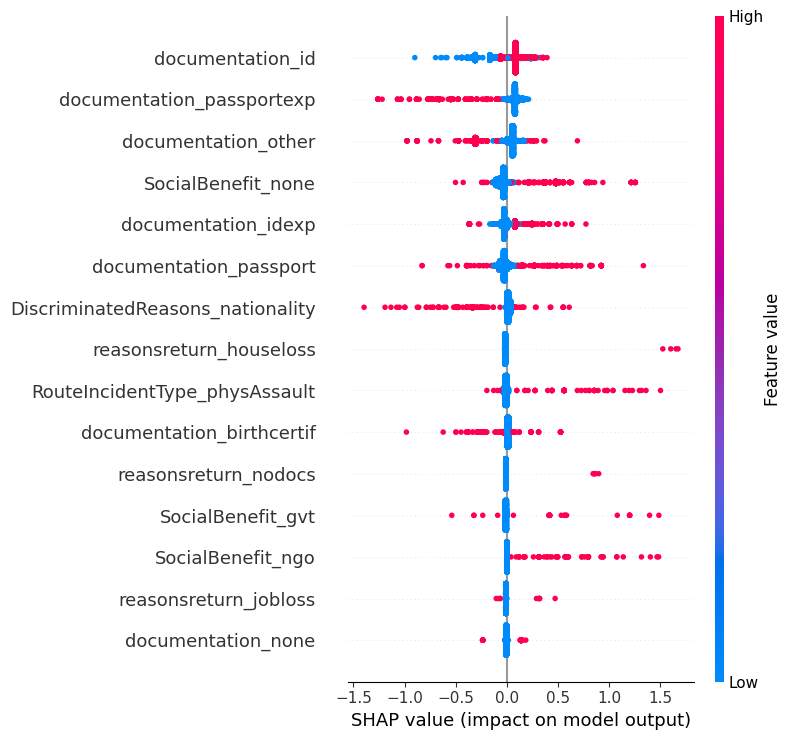

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="dot", max_display=15)


In [ ]:
shap_importance = pd.DataFrame({
    'variable': X_train.columns,
    'mean_abs_shap': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

# top 15
shap_importance.head(15)


,variable,mean_abs_shap
14,documentation_id,0.133039
73,documentation_passportexp,0.108601
71,documentation_other,0.096108
63,SocialBenefit_none,0.083560
4,documentation_idexp,0.044826
51,documentation_passport,0.044539
67,DiscriminatedReasons_nationality,0.034270
12,reasonsreturn_houseloss,0.017994
64,RouteIncidentType_physAssault,0.015725
39,documentation_birthcertif,0.015220


Create the traffic light.

In [ ]:
import pandas as pd

# --------------------------------------------
# STEP 1: Define your main variable groups based on your SHAP
# --------------------------------------------

documentation_group = [
    'documentation_id', 'documentation_passportexp', 'documentation_other',
    'documentation_idexp', 'documentation_passport', 'documentation_birthcertif', 'documentation_none'
]

benefits_group = [
    'SocialBenefit_none', 'SocialBenefit_gvt', 'SocialBenefit_ngo'
]

returns_group = [
    'reasonsreturn_houseloss', 'reasonsreturn_nodocs', 'reasonsreturn_jobloss'
]

violence_group = [
    'DiscriminatedReasons_nationality', 'RouteIncidentType_physAssault'
]

# --------------------------------------------
# STEP 2: Apply to your real X_test
# (Here I simulate an example X_test, you should use your real X_test)
# --------------------------------------------

# Example data
# X_test = your real dataframe
# X_test should contain all those variables

# --------------------------------------------
# STEP 3: Calculate vulnerability presence flags
# --------------------------------------------

# Define functions
def evaluate_group(row, group):
    return int(any(row.get(var, 0) == 1 for var in group))

# Create columns indicating if each group is present
X_test['flag_documentation'] = X_test.apply(lambda x: evaluate_group(x, documentation_group), axis=1)
X_test['flag_benefits'] = X_test.apply(lambda x: evaluate_group(x, benefits_group), axis=1)
X_test['flag_returns'] = X_test.apply(lambda x: evaluate_group(x, returns_group), axis=1)
X_test['flag_violence'] = X_test.apply(lambda x: evaluate_group(x, violence_group), axis=1)

# Sum how many risk groups are activated
X_test['total_flags'] = X_test[['flag_documentation', 'flag_benefits', 'flag_returns', 'flag_violence']].sum(axis=1)

# --------------------------------------------
# STEP 4: Assign traffic light color
# --------------------------------------------

def assign_traffic_light(row):
    if row['flag_documentation'] == 1 and row['total_flags'] > 1:
        return '🔴 High Risk'
    elif row['total_flags'] == 1:
        return '🟠 Medium Risk'
    else:
        return '🟢 Low Risk'

X_test['traffic_light'] = X_test.apply(assign_traffic_light, axis=1)

# --------------------------------------------
# STEP 5: Optional - Create friendly explanations
# --------------------------------------------

def generate_explanation(row):
    reasons = []
    if row['flag_documentation']:
        reasons.append('Lack of documentation')
    if row['flag_benefits']:
        reasons.append('Absence of social benefits')
    if row['flag_returns']:
        reasons.append('Forced return reasons')
    if row['flag_violence']:
        reasons.append('Discrimination or violence')
    return ", ".join(reasons) if reasons else "No identified risks"

X_test['risk_explanation'] = X_test.apply(generate_explanation, axis=1)

# --------------------------------------------
# STEP 6: Show result
# --------------------------------------------

# Display the final columns
traffic_light_df = X_test[['traffic_light', 'risk_explanation']]

print(traffic_light_df.head(10))


       traffic_light                                   risk_explanation
12442  🟠 Medium Risk                              Lack of documentation
1057   🟠 Medium Risk                              Lack of documentation
3664   🟠 Medium Risk                              Lack of documentation
11042  🟠 Medium Risk                              Lack of documentation
3352     🔴 High Risk  Lack of documentation, Absence of social benef...
13056  🟠 Medium Risk                              Lack of documentation
2818   🟠 Medium Risk                              Lack of documentation
12939  🟠 Medium Risk                              Lack of documentation
5151   🟠 Medium Risk                              Lack of documentation
6736   🟠 Medium Risk                              Lack of documentation
